# Compare regression methods

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\henga\anaconda3\envs\hw8

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.4           |   py39h080aedc_0         109 KB
    ca-certificates-2022.3.29  |       haa95532_1         122 KB
    kiwisolver-1.3.2           |   py39hd77b12b_0          56 KB
    matplotlib-3.5.1           |   py39haa95532_1          29 KB
    matplotlib-base-3.5.1      |   py39hd77b12b_1         5.6 MB
    pandas-1.4.1               |   py39hd77b12b_1         8.9 MB
    ------------------------------------------------------------
                                           Total:        14.8 MB

The following NEW packages will be INSTALLED:

  bottleneck         pkgs/main/win-64::bottleneck-1.3.4-py39h080aedc_0
  brotli             pkgs/main/win-64::brotli-1.0.9-ha92

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import time

### Import Data

In [2]:
data1 = fetch_california_housing(as_frame=True)
data = data1.frame
x = data.iloc[:,:-1].values
y = data['MedHouseVal'].values
features = data1.feature_names + data1.target_names
print(features)
print(np.shape(x))

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
(20640, 8)


In [3]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:
correlation_matrix = np.corrcoef(x.T,y)
print(correlation_matrix)

[[ 1.         -0.11903399  0.32689543 -0.06204013  0.00483435  0.01876625
  -0.07980913 -0.01517587  0.68807521]
 [-0.11903399  1.         -0.15327742 -0.07774728 -0.29624424  0.01319136
   0.01117267 -0.10819681  0.10562341]
 [ 0.32689543 -0.15327742  1.          0.84762133 -0.07221285 -0.00485229
   0.10638897 -0.02754005  0.15194829]
 [-0.06204013 -0.07774728  0.84762133  1.         -0.0661974  -0.0061812
   0.06972113  0.01334439 -0.04670051]
 [ 0.00483435 -0.29624424 -0.07221285 -0.0661974   1.          0.06986273
  -0.10878475  0.09977322 -0.02464968]
 [ 0.01876625  0.01319136 -0.00485229 -0.0061812   0.06986273  1.
   0.00236618  0.00247582 -0.02373741]
 [-0.07980913  0.01117267  0.10638897  0.06972113 -0.10878475  0.00236618
   1.         -0.92466443 -0.14416028]
 [-0.01517587 -0.10819681 -0.02754005  0.01334439  0.09977322  0.00247582
  -0.92466443  1.         -0.04596662]
 [ 0.68807521  0.10562341  0.15194829 -0.04670051 -0.02464968 -0.02373741
  -0.14416028 -0.04596662  1.  

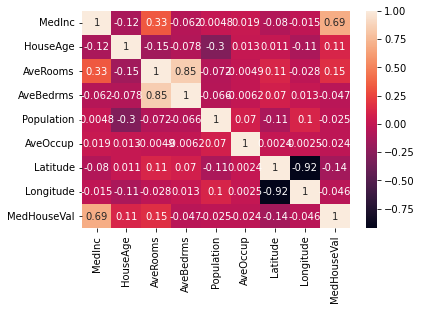

In [5]:
sns.heatmap(correlation_matrix, annot = True, yticklabels = features, xticklabels = features)
plt.show()

In [13]:
col = [0, 1, 2, 6]
X = x[:,col]
Y = y.reshape(y.shape[0],1)

In [14]:
print(np.shape(X))
print(np.shape(Y))

(20640, 4)
(20640, 1)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [32]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
sc1 = StandardScaler()
sc1.fit(y_train)
y_train_std = sc1.transform(y_train)
y_test_std = sc1.transform(y_test)

### (a) 

### (i) Linear Regression

In [182]:
start_time = time.time()
reg = LinearRegression()
reg.fit(x_train_std, y_train_std)
print(" Running time: %s seconds " % (time.time() - start_time))
y_test_pred_std = reg.predict(x_test_std)
y_train_pred_std = reg.predict(x_train_std)

 Running time: 0.008770942687988281 seconds 


In [183]:
y_test_pred = sc1.inverse_transform(y_test_pred_std)
y_train_pred = sc1.inverse_transform(y_train_pred_std)
print(y_test_pred)

[[2.06958344]
 [1.34802772]
 [2.36425543]
 ...
 [2.46713104]
 [2.81818897]
 [2.03748859]]


In [184]:
error_train = mean_squared_error(y_train_std, y_train_pred_std)
error_test = mean_squared_error(y_test_std, y_test_pred_std)
print(error_train)
print(error_test)

0.4804603927082151
0.4757003082887243


In [185]:
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)
print(error_train)
print(error_test)

0.6419568845085316
0.6355967994519686


In [186]:
r2_train = r2_score (y_train, y_train_pred)
r2_test = r2_score (y_test, y_test_pred)
print(r2_train)
print(r2_test)

0.5195396072917849
0.5154370387109977


In [187]:
print(reg.intercept_,reg.coef_)

[7.48488917e-15] [[ 0.71792629  0.18921081 -0.04049275 -0.0817175 ]]


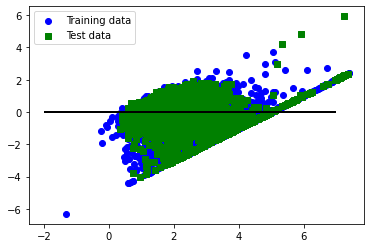

In [135]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0],1)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],1)
plt.scatter(y_train_pred, y_train_pred - y_train,  c='blue', marker='o', label='Training data') 
plt.scatter(y_test_pred, y_test_pred - y_test,  c='green', marker='s', label='Test data')
plt.hlines(y=0, xmin=-2, xmax=7, color='black', lw=2) 
plt.legend(loc='best')
plt.show()

### (ii) RANSACRegressor

In [163]:
start_time = time.time()
RANS = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='squared_loss', residual_threshold=2.0, random_state=1)
RANS.fit(x_train_std, y_train_std)
print(" Running time: %s seconds " % (time.time() - start_time))
y_test_pred_std = RANS.predict(x_test_std)
y_train_pred_std = RANS.predict(x_train_std)

 Running time: 0.10774517059326172 seconds 


In [164]:
y_test_pred = sc1.inverse_transform(y_test_pred_std)
y_train_pred = sc1.inverse_transform(y_train_pred_std)

In [165]:
error_train = mean_squared_error(y_train_std, y_train_pred_std)
error_test = mean_squared_error(y_test_std, y_test_pred_std) 
print(error_train)
print(error_test)

0.5057503987814449
0.483311016149007


In [166]:
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred) 
print(error_train)
print(error_test)

0.6757475855826823
0.6457656840906215


In [167]:
r2_train = r2_score (y_train, y_train_pred)
r2_test = r2_score (y_test, y_test_pred)
print(r2_train)
print(r2_test)

0.4942496012185552
0.5076845376635404


In [168]:
print(RANS.estimator_.intercept_,RANS.estimator_.coef_)

[-0.05611082] [[ 0.82872287  0.18199911 -0.18292909 -0.06445025]]


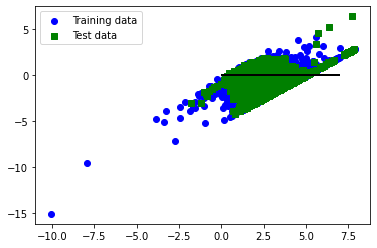

In [169]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0],1)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],1)
plt.scatter(y_train_pred, y_train_pred - y_train,  c='blue', marker='o', label='Training data') 
plt.scatter(y_test_pred, y_test_pred - y_test,  c='green', marker='s', label='Test data')
plt.hlines(y=0, xmin=0, xmax=7, color='black', lw=2) 
plt.legend(loc='best')
plt.show()

### (iii) Ridge

In [188]:
start_time = time.time()
ridge = Ridge(alpha=0.5)
ridge.fit(x_train_std, y_train_std)
print(" Running time: %s seconds " % (time.time() - start_time))
y_test_pred_std = ridge.predict(x_test_std)
y_train_pred_std = ridge.predict(x_train_std)

 Running time: 0.005875110626220703 seconds 


In [171]:
y_test_pred = sc1.inverse_transform(y_test_pred_std)
y_train_pred = sc1.inverse_transform(y_train_pred_std)

In [172]:
error_train = mean_squared_error(y_train_std, y_train_pred_std)
error_test = mean_squared_error(y_test_std, y_test_pred_std) 
print(error_train)
print(error_test)

0.48046039330880225
0.475699261387121


In [173]:
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred) 
print(error_train)
print(error_test)

0.6419568853109932
0.6355954006567675


In [174]:
r2_train = r2_score (y_train, y_train_pred )
r2_test = r2_score (y_test, y_test_pred )
print(r2_train)
print(r2_test)

0.5195396066911979
0.5154381051171619


In [175]:
print(ridge.intercept_,ridge.coef_)

[7.48452805e-15] [[ 0.7179011   0.18920315 -0.04048478 -0.08171774]]


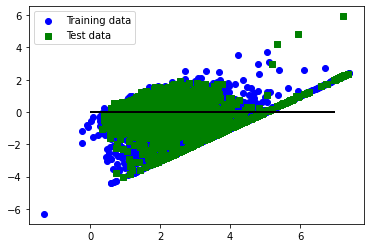

In [176]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0],1)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],1)
plt.scatter(y_train_pred, y_train_pred - y_train,  c='blue', marker='o', label='Training data') 
plt.scatter(y_test_pred, y_test_pred - y_test,  c='green', marker='s', label='Test data')
plt.hlines(y=0, xmin=0, xmax=7, color='black', lw=2) 
plt.legend(loc='best')
plt.show()

### (iv) Lasso

In [154]:
start_time = time.time()
lasso = Lasso(alpha=0.01)
lasso.fit(x_train_std, y_train_std)
print(" Running time: %s seconds " % (time.time() - start_time))
y_test_pred_std = lasso.predict(x_test_std)
y_train_pred_std = lasso.predict(x_train_std)

 Running time: 0.008333444595336914 seconds 


In [155]:
y_test_pred = sc1.inverse_transform(y_test_pred_std)
y_train_pred = sc1.inverse_transform(y_train_pred_std)

In [156]:
error_train = mean_squared_error(y_train_std, y_train_pred_std)
error_test = mean_squared_error(y_test_std, y_test_pred_std)
print(error_train)
print(error_test)

0.4809042278215723
0.4760974525448057


In [157]:
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)
print(error_train)
print(error_test)

0.6425499053088525
0.636127435261296


In [158]:
r2_train = r2_score (y_train, y_train_pred )
r2_test = r2_score (y_test, y_test_pred )
print(r2_train)
print(r2_test)

0.5190957721784277
0.5150324953600001


In [159]:
print(lasso.intercept_,lasso.coef_)

[7.46275071e-15] [ 0.70346528  0.17916747 -0.02829709 -0.07404027]


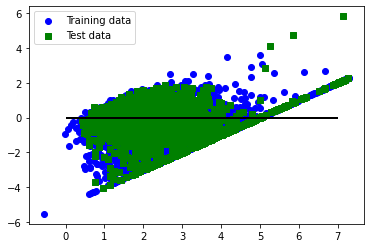

In [160]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0],1)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],1)
plt.scatter(y_train_pred, y_train_pred - y_train,  c='blue', marker='o', label='Training data') 
plt.scatter(y_test_pred, y_test_pred - y_test,  c='green', marker='s', label='Test data')
plt.hlines(y=0, xmin=0, xmax=7, color='black', lw=2) 
plt.legend(loc='best')
plt.show()

### (b) Non-linear Regression

In [107]:
twoD = PolynomialFeatures(degree=2) 
x_train_twoD_std = twoD.fit_transform(x_train_std)
x_test_twoD_std = twoD.fit_transform(x_test_std)

start_time = time.time()
non_reg = LinearRegression()
non_reg.fit(x_train_twoD_std, y_train_std)
print(" Running time: %s seconds " % (time.time() - start_time))
y_test_pred_std = non_reg.predict(x_test_twoD_std)
y_train_pred_std = non_reg.predict(x_train_twoD_std)

 Running time: 0.007913589477539062 seconds 


In [108]:
y_test_pred = sc1.inverse_transform(y_test_pred_std)
y_train_pred = sc1.inverse_transform(y_train_pred_std)

In [109]:
error_train = mean_squared_error(y_train_std, y_train_pred_std)
error_test = mean_squared_error(y_test_std, y_test_pred_std)
print(error_train)
print(error_test)

0.45484934617570444
0.4488957129910834


In [110]:
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)
print(error_train)
print(error_test)

0.60773723208653
0.5997824123579721


In [111]:
r2_train = r2_score (y_train, y_train_pred )
r2_test = r2_score (y_test, y_test_pred )
print(r2_train)
print(r2_test)

0.5451506538242955
0.542741023693271


In [112]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0],1)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],1)

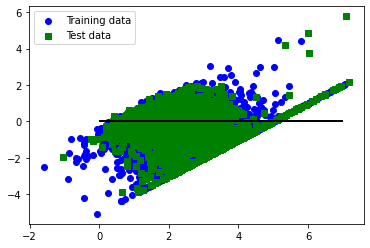

In [113]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0],1)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],1)
plt.scatter(y_train_pred, y_train_pred - y_train,  c='blue', marker='o', label='Training data') 
plt.scatter(y_test_pred, y_test_pred - y_test,  c='green', marker='s', label='Test data')
plt.hlines(y=0, xmin=0, xmax=7, color='black', lw=2) 
plt.legend(loc='best')
plt.show()

In [122]:
threeD = PolynomialFeatures(degree=3) 
x_train_threeD_std = threeD.fit_transform(x_train_std)
x_test_threeD_std = threeD.fit_transform(x_test_std)

start_time = time.time()
non_reg = LinearRegression()
non_reg.fit(x_train_threeD_std , y_train_std)
print(" Running time: %s seconds " % (time.time() - start_time))
y_test_pred_std = non_reg.predict(x_test_threeD_std)
y_train_pred_std = non_reg.predict(x_train_threeD_std)

 Running time: 0.04627561569213867 seconds 


In [123]:
y_test_pred = sc1.inverse_transform(y_test_pred_std)
y_train_pred = sc1.inverse_transform(y_train_pred_std)

In [124]:
error_train = mean_squared_error(y_train_std, y_train_pred_std)
error_test = mean_squared_error(y_test_std, y_test_pred_std)
print(error_train)
print(error_test)

0.4207250816006896
0.41450221766894585


In [125]:
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)
print(error_train)
print(error_test)

0.5621428253358675
0.5538282786989943


In [126]:
r2_train = r2_score (y_train, y_train_pred )
r2_test = r2_score (y_test, y_test_pred )
print(r2_train)
print(r2_test)

0.5792749183993104
0.577775295590903


In [127]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0],1)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],1)

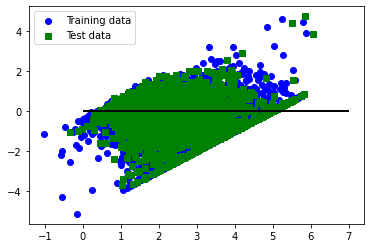

In [128]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0],1)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],1)
plt.scatter(y_train_pred, y_train_pred - y_train,  c='blue', marker='o', label='Training data') 
plt.scatter(y_test_pred, y_test_pred - y_test,  c='green', marker='s', label='Test data')
plt.hlines(y=0, xmin=0, xmax=7, color='black', lw=2) 
plt.legend(loc='best')
plt.show()